In [1]:
import pandas as pd
import re
from datetime import date, datetime, timedelta
from dateutil.relativedelta import relativedelta

current_date = datetime(2021, 9, 29, 12, 33, 4)

def when(x):
    
    p = re.compile('(\d+)')
    delta = -int(p.findall(x)[0])
    if x.find("초") >= 0:
        result = timedelta(seconds = delta)
        
    elif x.find("분") >= 0:
        result = timedelta(minutes = delta)
        
    elif x.find("시간") >= 0:
        result = timedelta(hours = delta)
     
    elif x.find("일") >= 0:
        result = timedelta(days = delta)
        
    elif x.find("달") >= 0:
        result = relativedelta(months = delta)
        
    elif x.find("년") >= 0:
        result = relativedelta(years = delta)
        
    else:
        result = timedelta(days = 0)

    return current_date + result

In [31]:
when("끌올 3시간 전")

datetime.datetime(2021, 9, 29, 9, 33, 4)

In [32]:
current_date = datetime(2021, 9, 29, 12, 33, 4)
current_date

datetime.datetime(2021, 9, 29, 12, 33, 4)

In [24]:
current_date = datetime(2021, 9, 29, 12, 33, 4)
p = re.compile('(\d+)')
delta = -int(p.findall("끌올 12초 전")[0])
result = timedelta(seconds = delta)
result
current_date + result

datetime.datetime(2021, 9, 29, 12, 32, 52)

In [61]:
df = pd.read_excel('carrot_list_용산구_선물세트_2021-09-29 181253.xlsx')
df.shape

(2397, 10)

In [102]:
df.head(3)

,num,region,title,category,time,price,detail,interest,chat,view,date
0,235024996,용산구 보광동,마티스 드로잉 옆서 2세트 가격,가구/인테리어,끌올 1달 전,7000,일반 옆서 크기에요\n마티스 그림이에요\n벽면에 몇개붙여 놓아도 분위기\n확살아요 ...,1,1,95,2021-08-29
1,207886534,용산구 한강로1가,아미니(Amini) 대용량4종+비누2종 선물세트,뷰티/미용,끌올 3달 전,28000,향도 좋고 품질좋은 아미니 선물세트입니다.\n각 500ml×4 대용량 4종류(샴푸 ...,7,0,142,2021-06-29
2,171692210,용산구 문배동,닥터 브로너스 퓨어 캐스틸 솝 선물세트 (새상품),뷰티/미용,끌올 8달 전,24000,닥터브로너스 퓨어 캐스틸 솝 선물세트 입니다. 새상품입니다.\n12가지 종류의 솝이...,3,0,86,2021-01-29


In [104]:
df['date'] = df['time'].apply(when) # 날짜 변환 
df['ym_date'] = df['date'].dt.strftime('%Y-%m') # 년도 - 월 추출 
df.head(3)

,num,region,title,category,time,price,detail,interest,chat,view,date,ym_date
0,235024996,용산구 보광동,마티스 드로잉 옆서 2세트 가격,가구/인테리어,끌올 1달 전,7000,일반 옆서 크기에요\n마티스 그림이에요\n벽면에 몇개붙여 놓아도 분위기\n확살아요 ...,1,1,95,2021-08-29,2021-08
1,207886534,용산구 한강로1가,아미니(Amini) 대용량4종+비누2종 선물세트,뷰티/미용,끌올 3달 전,28000,향도 좋고 품질좋은 아미니 선물세트입니다.\n각 500ml×4 대용량 4종류(샴푸 ...,7,0,142,2021-06-29,2021-06
2,171692210,용산구 문배동,닥터 브로너스 퓨어 캐스틸 솝 선물세트 (새상품),뷰티/미용,끌올 8달 전,24000,닥터브로너스 퓨어 캐스틸 솝 선물세트 입니다. 새상품입니다.\n12가지 종류의 솝이...,3,0,86,2021-01-29,2021-01


# 한 달 내

In [105]:
df_less_amonth = df[df.time.str.contains("초|분|시간|일")]
df_less_amonth.shape

(566, 12)

<AxesSubplot:xlabel='date'>

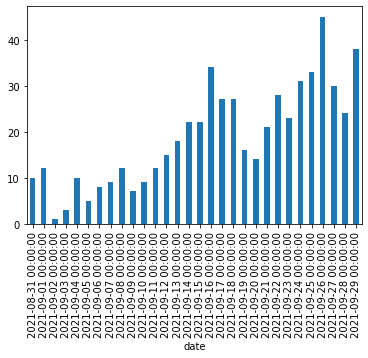

In [106]:
df_less_amonth.groupby('date').title.count().plot.bar() # 날짜별 물량 

<AxesSubplot:xlabel='date'>

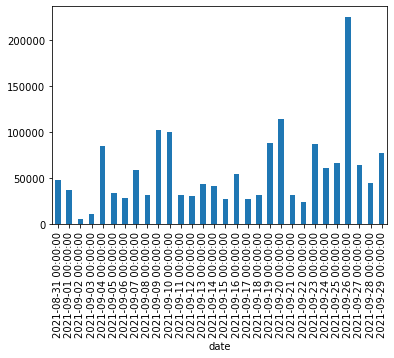

In [107]:
df_less_amonth.groupby('date').price.mean().plot.bar() # 날짜별 평균 가격 

<AxesSubplot:xlabel='date'>

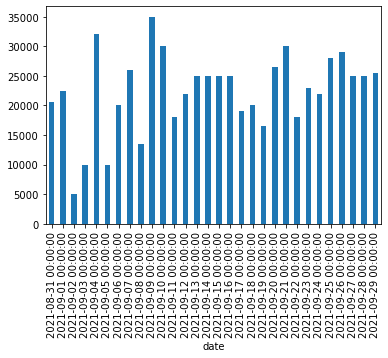

In [108]:
df_less_amonth.groupby('date').price.median().plot.bar() # 날짜별 중간값 가격

<AxesSubplot:xlabel='date'>

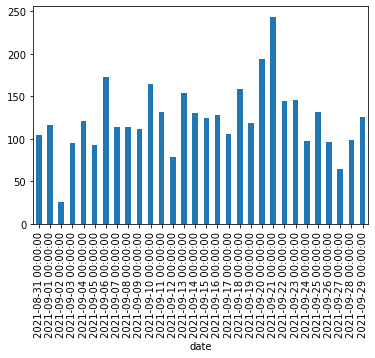

In [109]:
df_less_amonth.groupby('date').view.median().plot.bar() # 날짜별  view 평균 

# 한달 이상

<AxesSubplot:xlabel='ym_date'>

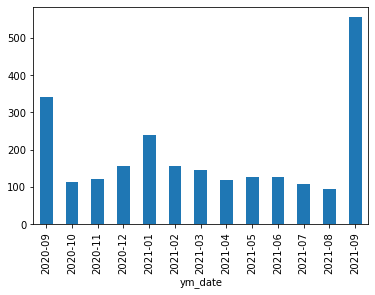

In [112]:
df.groupby('ym_date').title.count().plot.bar() # 물량 

<AxesSubplot:xlabel='ym_date'>

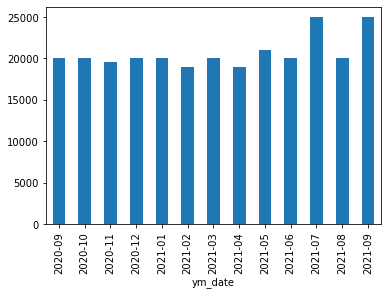

In [113]:
df.groupby('ym_date').price.median().plot.bar() # 가격 - 중간값 

<AxesSubplot:xlabel='ym_date'>

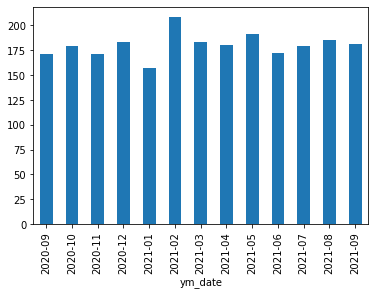

In [115]:
df.groupby('ym_date').view.mean().plot.bar()

# 년도별

<AxesSubplot:xlabel='date'>

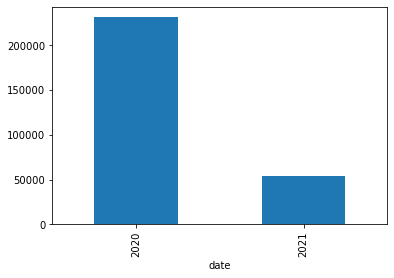

In [119]:
df.groupby(df['date'].dt.year).price.mean().plot.bar()

<AxesSubplot:xlabel='date'>

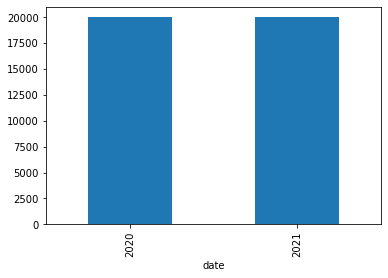

In [120]:
df.groupby(df['date'].dt.year).price.median().plot.bar()